In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

import SimpleITK as sitk
print( sitk.Version() )

# Download data to work on
from downloaddata import fetch_midas_data as fdata

from myshow import myshow

from __future__ import print_function


SimpleITK Version: 0.9.0
Compiled: May 14 2015 00:27:05



#Demonstrate Reporting of Progress With ConnectedThresholdImageFilter

In [7]:
img = sitk.Image(100,100, sitk.sitkUInt8)

In [23]:
ctFilter = sitk.ConnectedThresholdImageFilter()
ctFilter.SetSeed([0,0])
ctFilter.SetUpper(1)
ctFilter.SetLower(0)
ctFilter.AddCommand(sitk.sitkProgressEvent, lambda: print("\rProgress: {0:03.1f}%...".format(100*ctFilter.GetProgress())))

0

Demonstrate reporting of Progress

In [24]:
ctFilter.Execute(img)

Progress: 0.0%...
Progress: 1.0%...
Progress: 2.0%...
Progress: 3.0%...
Progress: 4.0%...
Progress: 5.0%...
Progress: 6.0%...
Progress: 7.0%...
Progress: 8.0%...
Progress: 9.0%...
Progress: 10.0%...
Progress: 11.0%...
Progress: 12.0%...
Progress: 13.0%...
Progress: 14.0%...
Progress: 15.0%...
Progress: 16.0%...
Progress: 17.0%...
Progress: 18.0%...
Progress: 19.0%...
Progress: 20.0%...
Progress: 21.0%...
Progress: 22.0%...
Progress: 23.0%...
Progress: 24.0%...
Progress: 25.0%...
Progress: 26.0%...
Progress: 27.0%...
Progress: 28.0%...
Progress: 29.0%...
Progress: 30.0%...
Progress: 31.0%...
Progress: 32.0%...
Progress: 33.0%...
Progress: 34.0%...
Progress: 35.0%...
Progress: 36.0%...
Progress: 37.0%...
Progress: 38.0%...
Progress: 39.0%...
Progress: 40.0%...
Progress: 41.0%...
Progress: 42.0%...
Progress: 43.0%...
Progress: 44.0%...
Progress: 45.0%...
Progress: 46.0%...
Progress: 47.0%...
Progress: 48.0%...
Progress: 49.0%...
Progress: 50.0%...
Progress: 51.0%...
Progress: 52.0%...
Pro

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x111dea840> >

# Performance comparison of Median and Rank image fitlers

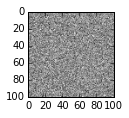

In [38]:
img = sitk.Image(100,100,100,sitk.sitkFloat32)
img = sitk.AdditiveGaussianNoise(img)
myshow(img)

radius = [3,3,3]

In [42]:
%timeit -n 1 sitk.Median(img,radius=radius)

1 loops, best of 3: 1.08 s per loop


In [44]:
%timeit -n 1 sitk.FastApproximateRank(img, rank=0.5, radius=radius)

1 loops, best of 3: 1.52 s per loop


In [45]:
%timeit -n 1 sitk.Rank(img, rank=0.5, radius=radius)

1 loops, best of 3: 4.3 s per loop


In [46]:
%timeit -n 1 sitk.Mean(img,radius=radius)

1 loops, best of 3: 576 ms per loop


# Compare Binary and GrayScale Dilate

In [ ]:
img = sitk.ReadImage(fdata("cthead1.png"))
myshow(img)

# First create a simple binary image (0 and 1s) for the common cthead1.png test data set
bimg = img >100
myshow(bimg)

Visually show that for binary images the output will be the same.

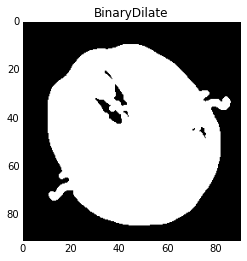

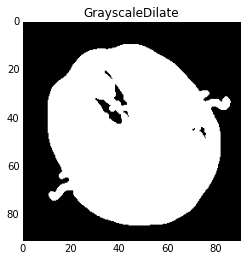

In [57]:
myshow(sitk.BinaryDilate(bimg, radius, sitk.sitkBall), title="BinaryDilate")
myshow(sitk.GrayscaleDilate(bimg, radius, sitk.sitkBall), title="GrayscaleDilate")

Breifly show that there is a performance difference. These images are only 2D an small to it may not be very accurate, but the filters use different algoritms and the GrayscaleDilate changes which algorithm based on the structuring element.

In [66]:
%timeit -n 100 sitk.BinaryDilate(bimg, 10, sitk.sitkBall)
%timeit -n 100 sitk.GrayscaleDilate(bimg, 10, sitk.sitkBall)

100 loops, best of 3: 3.16 ms per loop
100 loops, best of 3: 4.3 ms per loop


In [65]:
%timeit -n 100 sitk.BinaryDilate(bimg, 10, sitk.sitkBox)
%timeit -n 100 sitk.GrayscaleDilate(bimg, 10, sitk.sitkBox)

100 loops, best of 3: 3.29 ms per loop
100 loops, best of 3: 2.44 ms per loop
